# Project 4
#### _Mary Johnson_

## Part 2 - Exploratory Data Analysis

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import preprocessing
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:

visas =pd.read_table('./data/h1b_kaggle.csv', sep = ',')


The above cell reads in the data and splits the data based on commas, because it is a CSV file.

In [6]:
visas2 = visas.head(50000)
visas2.shape
visas = visas2
visas.shape

(50000, 11)

In [3]:
visas.columns
visas.set_index(['Unnamed: 0'], inplace = True)


The above cell changes the first column to be the index column. 

In [8]:
visas.head()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
Unnamed: 0,,,,,,,,,,
1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003


The above cell allows for a quick glance at the data. Without having to look at the entire data set, we gain a preliminary understanding of the kinds of values in each column. 

In [9]:
visas.shape

(50000, 10)

The above cell tells us how many columns there are (10), and how many observations there are (3,002,458)

In [10]:
visas.isnull().sum()

CASE_STATUS              0
EMPLOYER_NAME            1
SOC_NAME                 1
JOB_TITLE                0
FULL_TIME_POSITION       0
PREVAILING_WAGE          0
YEAR                     0
WORKSITE                 0
lon                   2127
lat                   2127
dtype: int64

The above cell shows how many values in each column are null. It appears that there are a number of values in the lon and lat columns that do not have real values. 

In [4]:
#passengers["Age"].fillna(value=29.69).head(10
visas['lat'].fillna(value = 0, inplace = True) 
visas['lon'].fillna(value = 0, inplace = True)
#viasa.dropna(thresh=2)
visas.isnull().sum()

CASE_STATUS              13
EMPLOYER_NAME            59
SOC_NAME              17734
JOB_TITLE                43
FULL_TIME_POSITION       15
PREVAILING_WAGE          85
YEAR                     13
WORKSITE                  0
lon                       0
lat                       0
dtype: int64

Since I do not indend to use the Lat and Lon columns in my data analysis/model, but I also do not want to eliminate them, I decided to fill the null lat and lon values with 0 

In [5]:
visas.dropna(inplace = True)

The above cell drops all the rows that contain na values. This could potentially distort the data. Since the data set has over 3 million rows, dropping 18,000 should not greatly effect the analysis or resulting model. 

In [13]:
visas.isnull().sum()

CASE_STATUS           0
EMPLOYER_NAME         0
SOC_NAME              0
JOB_TITLE             0
FULL_TIME_POSITION    0
PREVAILING_WAGE       0
YEAR                  0
WORKSITE              0
lon                   0
lat                   0
dtype: int64

The above cell shows that all of the null values were removed. 

In [14]:
visas.dtypes

CASE_STATUS            object
EMPLOYER_NAME          object
SOC_NAME               object
JOB_TITLE              object
FULL_TIME_POSITION     object
PREVAILING_WAGE       float64
YEAR                  float64
WORKSITE               object
lon                   float64
lat                   float64
dtype: object

The above cell shows the data value types for each column

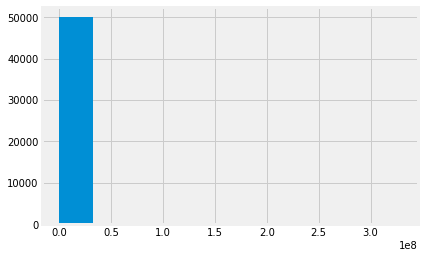

In [15]:
visas['PREVAILING_WAGE'].hist(bins = 10);

The above cell is a histogram of the 'Prevailing_wage' column. I theorize that there is probably an outlier which is distorting the histogram. 

In [6]:
print(visas["PREVAILING_WAGE"].values.argmax())


2155780


The above cell identifies the index of the largest prevailing wage. The index would allow us to remove it in order to see if the resulting histogram is more normal. Looking at the job title of Physical Theapist, it appears that this entry may have been mis entered, as it is fairly unlikely that a physical therapist makes over a billion dollars. 

In [7]:
visas.iloc[visas["PREVAILING_WAGE"].values.argmax(),5] = 69976


In [20]:
visas.iloc[5579,:]

CASE_STATUS                                       DENIED
EMPLOYER_NAME                         E AND D MEDIA INC.
SOC_NAME                              MARKETING MANAGERS
JOB_TITLE             DIRECTOR, SOCIAL AND DIGITAL MEDIA
FULL_TIME_POSITION                                     Y
PREVAILING_WAGE                                    69976
YEAR                                                2016
WORKSITE                        SANTA MONICA, CALIFORNIA
lon                                             -118.491
lat                                              34.0195
Name: 5580, dtype: object

The above cell changes the value of the prevailing wage to a (perceived) more reasonable value

In [8]:

#visas_a = visas.drop([2155780],axis = 0)
mask = (visas['PREVAILING_WAGE']<1000000)
visas_b = visas[mask]
#visas_b['PREVAILING_WAGE'].hist()
#print('The mask eliminating prevailing wages above 1 million eliminated', visas.shape[0]-visas_b.shape[0], 'observations')

The above cell indicates that 2002 observations had wages above 1 million. In order to get a better sense of what the majority of wages in the data set are, we drop all the wages above 1 million and create a histogram from the resulting values. 

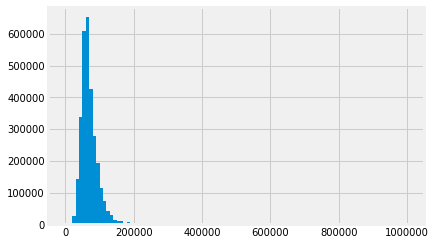

In [16]:
visas_b['PREVAILING_WAGE'].hist(bins = 100)

Adding more bins to the above histogram gives a more defined visual of the spread of prevailing wages in our dataset. 

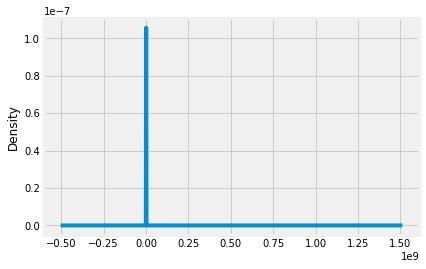

In [17]:
#drinks.beer.plot(kind='density', xlim=(0, 500));
visas['PREVAILING_WAGE'].plot(kind = 'density')
#mask2 = (visas_b['PREVAILING_WAGE'])

A density plot is another way for us to visually interpret the spread of wages in our data set. This density plot is also useful because it was derived using all the prevailing wage values in the data set. 

In [18]:
visas.corr()

,PREVAILING_WAGE,YEAR,lon,lat
PREVAILING_WAGE,1.000000,-0.011886,0.000203,-0.002038
YEAR,-0.011886,1.000000,-0.035898,0.037262
lon,0.000203,-0.035898,1.000000,-0.520174
lat,-0.002038,0.037262,-0.520174,1.000000


The above cell shows the correlation between the numeric columns. This information does not tell us much, since lon and lat are not numeric variables where correlation indicates a lot to the user. The correlation between prevailing wage and year is also very insignificant. 

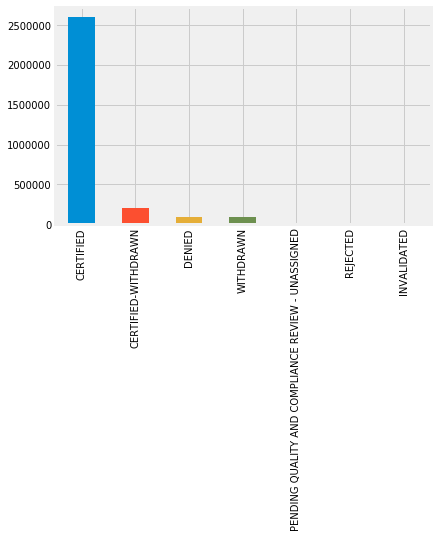

In [19]:
#users.gender.value_counts().plot(kind='bar')   
visas['CASE_STATUS'].value_counts().plot(kind='bar')

The above bar chart shows the counts for each kind of case status identifier. The majority of cases were certified, with the next larest being certified withdrawn. 

In [20]:
visas.describe()

,PREVAILING_WAGE,YEAR,lon,lat
count,2.984609e+06,2.984609e+06,2.984609e+06,2.984609e+06
mean,1.446212e+05,2.013864e+03,-8.883130e+01,3.679293e+01
std,3.412260e+06,1.678808e+00,2.580018e+01,8.445840e+00
min,0.000000e+00,2.011000e+03,-1.578583e+02,0.000000e+00
25%,5.435000e+04,2.012000e+03,-1.055911e+02,3.402112e+01
50%,6.500000e+04,2.014000e+03,-8.451202e+01,3.895922e+01
75%,8.143200e+04,2.015000e+03,-7.466722e+01,4.082066e+01
max,1.007814e+09,2.016000e+03,1.457298e+02,6.483778e+01


The above cell is a descriptive cell for all the numeric values. As will the correlation matrix, the values for lat and lon are not very relevent. For prevailing wage it is notable that the minimum prevailing wage is 0, while the max is over 1 billion 

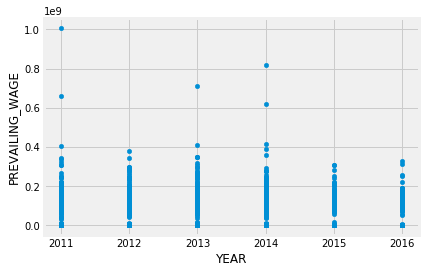

In [21]:
visas.plot(kind = "scatter", x = 'YEAR', y = 'PREVAILING_WAGE');

The above plot shows the spread of prevailing wages for each year. 

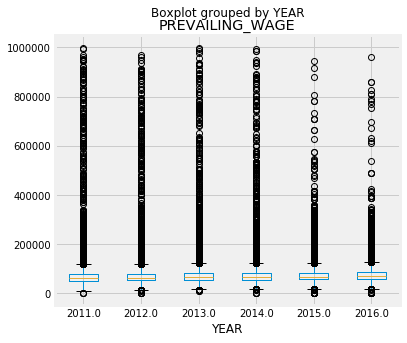

In [22]:
visas_b.boxplot(column = 'PREVAILING_WAGE', by = 'YEAR', figsize = (6,5));

The above box plot similarly shows the spread of prevailing wage for each year. THis plot highlights that while there are a vast amount of outliers, the majority of the data is still less than 200,000 for prevailing wage. 

In [23]:
visas['CASE_STATUS'].value_counts()

CERTIFIED              43776
CERTIFIED-WITHDRAWN     3135
WITHDRAWN               1804
DENIED                  1283
Name: CASE_STATUS, dtype: int64

This cell is a numeric representation of the bar plot shown earlier, illustrating the breakdwon of the case status variable.

In [9]:
#season_dummies = pd.get_dummies(bikes.season, prefix='season')# you can add the arguement drop_fist =True)
equiv = {'CERTIFIED':1, "CERTIFIED-WITHDRAWN":2, "DENIED":3, "WITHDRAWN":4, \
         "PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED":5, "REJECTED":6, "INVALIDATED":7}
visas['CASE_NUMS'] = visas['CASE_STATUS'].map(equiv)
visas.head()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat,CASE_NUMS
Unnamed: 0,,,,,,,,,,,
1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826,2
2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843,2
3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158,2
4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236,2
5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003,4


The above cell assigns the case_status variables to numeric values, to allow for easier modeling and predictability. 

In [10]:
case_dummies = pd.get_dummies(visas['CASE_NUMS'], prefix = 'case', drop_first = True)
#bikes_dummies = pd.concat([bikes, season_dummies], axis=1)
visas_dummies = pd.concat([visas, case_dummies], axis = 1)

The above cell creates dummies columns for the numeric values for the case_status variable.

In [26]:
visas_dummies.head()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat,CASE_NUMS,case_2,case_3,case_4
Unnamed: 0,,,,,,,,,,,,,,
1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826,2,1,0,0
2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843,2,1,0,0
3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158,2,1,0,0
4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236,2,1,0,0
5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003,4,0,0,1


In [11]:
employers2 = visas_dummies['EMPLOYER_NAME'].unique()
employers = employers2.tolist()
#type(employeers)

In [64]:
len(employers)
nums = range(1,len(employers)+1)
employers_nums = zip(employers, nums)
employers_nums_set = set(employers_nums)
employers_dict = dict(zip(employers, [x for x in nums]))
employers_dict

{'UNIVERSITY OF MICHIGAN': 1,
 'GOODMAN NETWORKS, INC.': 2,
 'PORTS AMERICA GROUP, INC.': 3,
 'GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY OF TOMKINS PLC': 4,
 'PEABODY INVESTMENTS CORP.': 5,
 'BURGER KING CORPORATION': 6,
 'BT AND MK ENERGY AND COMMODITIES': 7,
 'GLOBO MOBILE TECHNOLOGIES, INC.': 8,
 'ESI COMPANIES INC.': 9,
 'LESSARD INTERNATIONAL LLC': 10,
 'H.J. HEINZ COMPANY': 11,
 'DOW CORNING CORPORATION': 12,
 'ACUSHNET COMPANY': 13,
 'BIOCAIR, INC.': 14,
 'NEWMONT MINING CORPORATION': 15,
 'VRICON, INC.': 16,
 'CARDIAC SCIENCE CORPORATION': 17,
 'WESTFIELD CORPORATION': 18,
 'QUICKLOGIX LLC': 19,
 'MCCHRYSTAL GROUP, LLC': 20,
 'CUDDLE BARN, INC.': 21,
 'LOMICS, LLC': 22,
 'UC UNIVERSITY HIGH SCHOOL EDUCATION INC.': 23,
 'VMS COMMUNICATIONS LLC': 24,
 'QUICKLOGIX, INC.': 25,
 'FOODESSENTIALS CORPORATION': 26,
 'HELLO INC.': 27,
 'UMBEL CORP': 28,
 'PERSPECTIVES OF FREEDOM FOUNDATION, INC': 29,
 'GTH INC.': 30,
 'THE KRAFT HEINZ COMPANY': 31,
 'REGED, INC.': 32,
 'FINLAY EXTRAC

In [65]:
visas_dummies['EMPLOYER_NUMS'] = visas['EMPLOYER_NAME'].map(employers_dict)
visas_dummies.head()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat,CASE_NUMS,case_2,case_3,case_4,EMPLOYER_NUMS
Unnamed: 0,,,,,,,,,,,,,,,
1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826,2,1,0,0,1
2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843,2,1,0,0,2
3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158,2,1,0,0,3
4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236,2,1,0,0,4
5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003,4,0,0,1,5


In [66]:
employer_dummies = pd.get_dummies(visas_dummies['EMPLOYER_NUMS'], prefix = 'employer', drop_first = True)
#bikes_dummies = pd.concat([bikes, season_dummies], axis=1)
visas_dummies2 = pd.concat([visas_dummies, employer_dummies], axis = 1)

In [67]:
visas_dummies2.head()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat,...,employer_18611,employer_18612,employer_18613,employer_18614,employer_18615,employer_18616,employer_18617,employer_18618,employer_18619,employer_18620
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826,...,0,0,0,0,0,0,0,0,0,0
2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843,...,0,0,0,0,0,0,0,0,0,0
3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158,...,0,0,0,0,0,0,0,0,0,0
4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236,...,0,0,0,0,0,0,0,0,0,0
5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003,...,0,0,0,0,0,0,0,0,0,0


In [55]:
visas_dummies.dtypes

CASE_STATUS            object
EMPLOYER_NAME          object
SOC_NAME               object
JOB_TITLE              object
FULL_TIME_POSITION     object
PREVAILING_WAGE       float64
YEAR                  float64
WORKSITE               object
lon                   float64
lat                   float64
CASE_NUMS               int64
case_2                  uint8
case_3                  uint8
case_4                  uint8
dtype: object

The above cell shows us that all the dummies variable columns are of type int, meaning they are all integers. 

In [28]:
visas_dummies.corr()

,PREVAILING_WAGE,YEAR,lon,lat,CASE_NUMS,case_2,case_3,case_4,case_5,case_6,case_7
PREVAILING_WAGE,1.000000,-0.011886,0.000203,-0.002038,0.061290,-0.005686,0.106753,0.007053,-0.000041,-2.136407e-05,7.730890e-06
YEAR,-0.011886,1.000000,-0.035898,0.037262,-0.039189,0.025313,-0.112962,0.015404,-0.001154,6.621891e-05,4.682383e-05
lon,0.000203,-0.035898,1.000000,-0.520174,0.022474,-0.021257,0.046302,0.007106,0.000361,1.331821e-03,-7.416027e-04
lat,-0.002038,0.037262,-0.520174,1.000000,-0.040061,0.009990,-0.061467,-0.013363,0.000248,-1.551193e-03,3.737078e-05
CASE_NUMS,0.061290,-0.039189,0.022474,-0.040061,1.000000,0.326350,0.498469,0.758333,0.013177,6.084266e-03,5.202259e-03
case_2,-0.005686,0.025313,-0.021257,0.009990,0.326350,1.000000,-0.048456,-0.047201,-0.000603,-2.202519e-04,-1.557416e-04
case_3,0.106753,-0.112962,0.046302,-0.061467,0.498469,-0.048456,1.000000,-0.031594,-0.000404,-1.474246e-04,-1.042449e-04
case_4,0.007053,0.015404,0.007106,-0.013363,0.758333,-0.047201,-0.031594,1.000000,-0.000393,-1.436061e-04,-1.015448e-04
case_5,-0.000041,-0.001154,0.000361,0.000248,0.013177,-0.000603,-0.000404,-0.000393,1.000000,-1.835162e-06,-1.297655e-06
case_6,-0.000021,0.000066,0.001332,-0.001551,0.006084,-0.000220,-0.000147,-0.000144,-0.000002,1.000000e+00,-4.738357e-07


Running another correlation matrix allows us to see if wage or year had a large linear impact on any of the case status variables. The large majority of the correlation coefficients are insignificant. Implying that the two variables are not related, or that their relationship is not linear. 

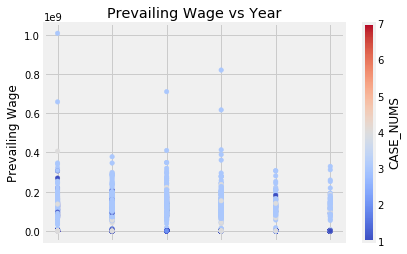

In [29]:
ax = visas_dummies.plot(kind = 'scatter', x = 'YEAR', y = 'PREVAILING_WAGE', c = 'CASE_NUMS', colormap = 'coolwarm', title = 'Prevailing Wage vs Year');
ax.set_xlabel("Year")
ax.set_ylabel('Prevailing Wage')
ax

The above plot shows that prevailing wage versus year, where the color indicates the status of the case. The most important colors are probably 1, which indicates that the case was certified, and 3, which indicates the case was denied. 

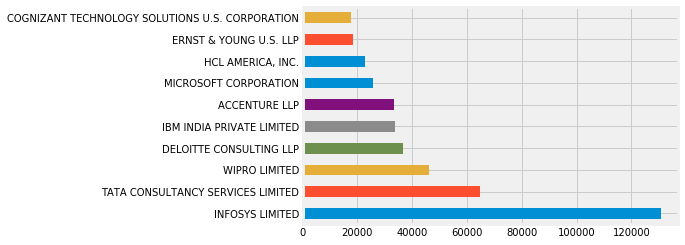

In [12]:
visas['EMPLOYER_NAME'].value_counts().head(10).plot.barh();

The above cell shows the companies that submitted the most H1B visa applications. 

In [13]:
visas_booz = visas_dummies[visas_dummies['EMPLOYER_NAME'].str.contains("BOOZ ALLEN HAMILTON")]
visas_booz.head()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat,CASE_NUMS,case_2,case_3,case_4,case_5,case_6,case_7
Unnamed: 0,,,,,,,,,,,,,,,,,
32474,CERTIFIED,BOOZ ALLEN HAMILTON INC.,MANAGEMENT ANALYSTS,ASSOCIATE - TRANSPORTATION ANALYST,Y,83158.0,2016.0,"WASHINGTON, DISTRICT OF COLUMBIA",-77.036871,38.907192,1,0,0,0,0,0,0
35592,CERTIFIED,BOOZ ALLEN HAMILTON INC.,MANAGEMENT ANALYSTS,SENIOR CONSULTANT - ENERGY MANAGEMENT ANALYST,N,65541.0,2016.0,"PITTSBURGH, PENNSYLVANIA",-79.995886,40.440625,1,0,0,0,0,0,0
35855,CERTIFIED,BOOZ ALLEN HAMILTON INC.,MANAGEMENT ANALYSTS,CONSULTANT - BUSINESS MANAGEMENT ANALYST,N,50200.0,2016.0,"WASHINGTON, DISTRICT OF COLUMBIA",-77.036871,38.907192,1,0,0,0,0,0,0
38402,CERTIFIED,BOOZ ALLEN HAMILTON INC.,MANAGEMENT ANALYSTS,SENIOR CONSULTANT - TRANSPORTATION ANALYST,Y,80496.0,2016.0,"BOSTON, MASSACHUSETTS",-71.058880,42.360083,1,0,0,0,0,0,0
41484,CERTIFIED,BOOZ ALLEN HAMILTON INC.,MANAGEMENT ANALYSTS,ASSOCIATE - TRANSPORTATION ANALYST,Y,82098.0,2016.0,"BOSTON, MASSACHUSETTS",-71.058880,42.360083,1,0,0,0,0,0,0


The above cell shows all the Booz Allen H1B visas requests. 

In [32]:
visas_booz.shape

(132, 17)

The shape of the dataframe indicates that within this data set there are 132 cases where Booz Allen submitted H1B visas requests. 

In [19]:
visas_booz['SOC_NAME'] = visas_booz['SOC_NAME'].str.upper()
#visas_booz[visas_booz['SOC_NAME'].str.contains("COMPUTER")]

C:\Users\595405\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


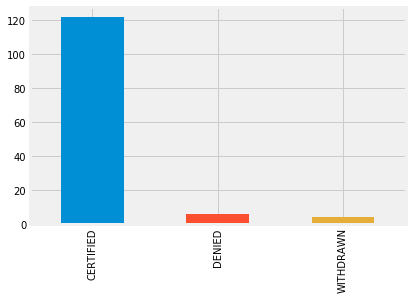

In [33]:
visas_booz['CASE_STATUS'].value_counts().plot(kind = 'bar');

The above cell shows the majority of Booz Allen requests were certified. 

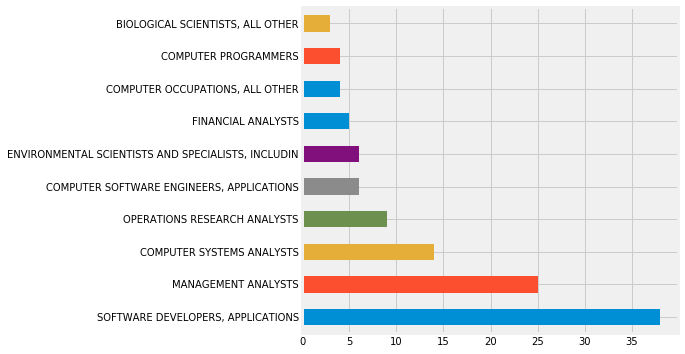

In [20]:
visas_booz['SOC_NAME'].value_counts(ascending = False).head(10).plot.barh( figsize = (6,6));

The above cell shows the types of positions for which Booz Allen submitted H1b applications. 

## Part 3 - Modeling

### Modeling the General Dataset


In [81]:
visas_dummies2.head()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat,...,employer_18611,employer_18612,employer_18613,employer_18614,employer_18615,employer_18616,employer_18617,employer_18618,employer_18619,employer_18620
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826,...,0,0,0,0,0,0,0,0,0,0
2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843,...,0,0,0,0,0,0,0,0,0,0
3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158,...,0,0,0,0,0,0,0,0,0,0
4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236,...,0,0,0,0,0,0,0,0,0,0
5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003,...,0,0,0,0,0,0,0,0,0,0


In [88]:
feature_cols = ['PREVAILING_WAGE', 'YEAR', 'EMPLOYER_NUMS']
X = visas_dummies2.drop(['CASE_STATUS','EMPLOYER_NAME','SOC_NAME','JOB_TITLE','FULL_TIME_POSITION',\
                         'WORKSITE','lon','lat','CASE_NUMS','EMPLOYER_NUMS'],axis = 1)
#'SOC_NAME','JOB_TITLE','FULL_TIME POSITION','WORKSITE','lon','lat','CASE_NUMS','EMPLOYER_NUMS'

The above cell dictates which columns are going to be used in the model. I chose Prevailing Wage and Year because they are the only two numeric columms whose numbers are important

In [89]:
X.head()

,PREVAILING_WAGE,YEAR,case_2,case_3,case_4,employer_2,employer_3,employer_4,employer_5,employer_6,...,employer_18611,employer_18612,employer_18613,employer_18614,employer_18615,employer_18616,employer_18617,employer_18618,employer_18619,employer_18620
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
1,36067.0,2016.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,242674.0,2016.0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,193066.0,2016.0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,220314.0,2016.0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,157518.4,2016.0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
y = visas_dummies['CASE_NUMS']

The above cell creates the vector of values that we are trying to predict with the model.

In [73]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

The above column splits the data into two larger groups, one group that the model will be trained on, and one group that the model will be tested on. This is adventageous because we can test the accuracy of the model on data that was not used to create the model. This will tell us whether the model is accurate, or over fitted. 

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train);

The above cell is creating the 'base' model

In [76]:
y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test,y_pred_class)))
#This is what you get when you run a KNN model with one neighbor

0.80208


The above cell is the accuracy score we get when we use a knn model with only one neighbor. While we get a score, we don't have anythign to compare it to, so right now it does not tell us much. 

In [77]:
most_freq_class = y_train.value_counts().index[0]
print(y_train.value_counts())
print(most_freq_class)

1    32912
2     2322
4     1317
3      947
Name: CASE_NUMS, dtype: int64
1


In [78]:
y_score = y_test.value_counts()[most_freq_class]/len(y_test)
y_score
#The y_score is the null_score, or the accurage that you get when you predict everything is the most frequent class. 

0.86912

The above cell shows the null score. This is the accuracy of the model when we predict that all of the observations are the same as the most frequent observation. This null score is what we will compare all othe scores against. 

In [79]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train);
y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test,y_pred_class)))

0.8692


In [80]:
scores = []
for k in range(1,15):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X,y)
    pred = knn.predict(X)
    score = float(sum(pred ==y))/ len(y)
    scores.append([k, score])
    print(k, score)

1 0.9481979279171167
2 0.9012560502420097
3 0.8962358494339774
4 0.8886955478219128
5 0.8855154206168246
6 0.8820552822112885
7 0.8804952198087923
8 0.8799151966078643
9 0.8793151726069043
10 0.8785151406056242
11 0.8781751270050802
12 0.8776951078043121
13 0.8774750990039601
14 0.8773350934037362


The above cell prints out the number of neighbors used for that particular model and the associated score for that model. The score represents the accuracy of the model. 

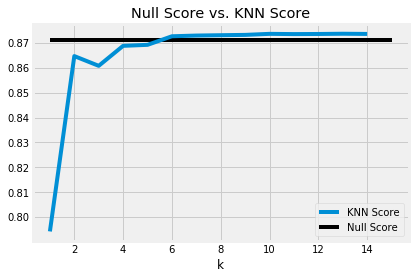

In [73]:
data = pd.DataFrame(scores, columns = ['k','score'])
data.plot.line(x = 'k', y = 'score', label = "KNN Score")
plt.hlines(y_score, 1,15, label = 'Null Score')
plt.legend(loc = 4) 
plt.title("Null Score vs. KNN Score");

The above graph shows the KNN Score, or accuracy vs the Null Score, or accuracy. This shows that the models that used less than 6 neighbors did worse that the null model. After 6 neighbors were used the accuracy was consistant around .873, which is marginally better than the null score. 

In [47]:
print('starting cell')
k_range = range(1,20)
training_error= []
testing_error = []
print('entering loop')
for k in k_range:
    print('loop round ',k)
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    
    y_pred_class = knn.predict(X_train)
    training_accuracy = metrics.accuracy_score(y_train, y_pred_class)
    training_error.append([k, 1-training_accuracy])
    
    y_pred_class = knn.predict(X_test)
    testing_accuracy = metrics.accuracy_score(y_test,y_pred_class)
    testing_error.append([k, 1-testing_accuracy])
    print(training_error, " ", testing_error)

starting cell
entering loop
loop round  1
[[1, 0.19773004249357595]]   [[1, 0.21382209814877107]]
loop round  2
[[1, 0.19773004249357595], [2, 0.1341491635305765]]   [[1, 0.21382209814877107], [2, 0.13921809602052126]]
loop round  3
[[1, 0.19773004249357595], [2, 0.1341491635305765], [3, 0.13752604473798014]]   [[1, 0.21382209814877107], [2, 0.13921809602052126], [3, 0.14330840993737204]]
loop round  4
[[1, 0.19773004249357595], [2, 0.1341491635305765], [3, 0.13752604473798014], [4, 0.12786804833331544]]   [[1, 0.21382209814877107], [2, 0.13921809602052126], [3, 0.14330840993737204], [4, 0.1318040669943028]]
loop round  5
[[1, 0.19773004249357595], [2, 0.1341491635305765], [3, 0.13752604473798014], [4, 0.12786804833331544], [5, 0.1283143380973314]]   [[1, 0.21382209814877107], [2, 0.13921809602052126], [3, 0.14330840993737204], [4, 0.1318040669943028], [5, 0.13206406728914843]]
loop round  6
[[1, 0.19773004249357595], [2, 0.1341491635305765], [3, 0.13752604473798014], [4, 0.12786804833

[[1, 0.19773004249357595], [2, 0.1341491635305765], [3, 0.13752604473798014], [4, 0.12786804833331544], [5, 0.1283143380973314], [6, 0.1262253982209166], [7, 0.12625979693145628], [8, 0.12563749298623694], [9, 0.12578670297740946], [10, 0.1257152251373268], [11, 0.12568931442029685], [12, 0.12557539661266515], [13, 0.12562945172922768], [14, 0.12556824882865691], [15, 0.12564642771624723], [16, 0.12566251023026587], [17, 0.12562051699921728], [18, 0.12569690894080565]]   [[1, 0.21382209814877107], [2, 0.13921809602052126], [3, 0.14330840993737204], [4, 0.1318040669943028], [5, 0.13206406728914843], [6, 0.12893334208935703], [7, 0.12882880588833656], [8, 0.12764808289988783], [9, 0.12754086628345662], [10, 0.1271589070874204], [11, 0.12693643260832566], [12, 0.12665766940560452], [13, 0.1267514839449818], [14, 0.12657725694328104], [15, 0.1265933394357458], [16, 0.12655447341228943], [17, 0.12641375160322343], [18, 0.126401689733875]]
loop round  19
[[1, 0.19773004249357595], [2, 0.1341

The above cell tests out models that run from 1 neighbor to 19 neighbors, and prints out the associated scores for each. 

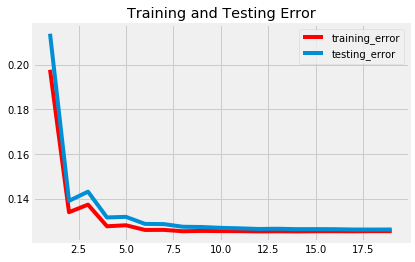

In [48]:
training_df = pd.DataFrame(training_error, columns = ['k', 'training_error'])
testing_df = pd.DataFrame(testing_error, columns = ['k', 'testing_error'])
#training_df.plot.line(x = 'k', y = 'training_error')
#testing_df.plot.line(x = 'k', y = 'testing_error')
plt.plot(training_df.k, training_df.training_error, 'r')
plt.plot(testing_df.k, testing_df.testing_error)
plt.legend()
plt.title('Training and Testing Error')
plt.show()

The above graph shows the difference between the testing and training error. They are highly correlated for all values of k. In general, the error seems to minimized aroung 10 neighbors, although a case could be made for only 7 or less neighbors. 

In [83]:
min(training_df.training_error)
print(training_df.idxmin())


k                  0
training_error    13
dtype: int64


The above cells shows that the training error was minimized at the 13th index, which corresponds to 14 neighbors. 

### Modeling the Booz Allen Dataset

In [54]:
X_bah = visas_booz[feature_cols]
y_bah = visas_booz['CASE_NUMS']

The above cell makes a new X, or variable matrix, and a new y, or response array. 

In [52]:
X.head()

,PREVAILING_WAGE,YEAR
Unnamed: 0,,
32474,83158.0,2016.0
35592,65541.0,2016.0
35855,50200.0,2016.0
38402,80496.0,2016.0
41484,82098.0,2016.0


In [55]:
X_bah_train, X_bah_test, y_bah_train, y_bah_test = train_test_split(X_bah, y_bah, random_state=99)

The above cell splits the X and y dataframes each into a testing and training set

In [57]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_bah_train, y_bah_train);

y_bah_pred_class = knn.predict(X_bah_test)
print((metrics.accuracy_score(y_bah_test,y_bah_pred_class)))
#This is what you get when you run a KNN model with one neighbor

0.8787878787878788


The above is the KNN score, or accuracy of the KNN model when one neighbor is used

In [58]:
most_freq_bah_class = y_bah_train.value_counts().index[0]
print(y_bah_train.value_counts())
print(most_freq_bah_class)

1    93
4     4
3     2
Name: CASE_NUMS, dtype: int64
1


As a reminder, below are the number assignments for each class.
equiv = {'CERTIFIED':1, "CERTIFIED-WITHDRAWN":2, "DENIED":3, "WITHDRAWN":4, \
         "PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED":5, "REJECTED":6, "INVALIDATED":7}
This means that in the Booz Allen dataset, 93 of the applications were certified, 4 were withdrawn, and 2 were denied. 

In [62]:
y_bah_score = y_bah_test.value_counts()[most_freq_bah_class]/len(y_bah_test)
y_bah_score

0.8787878787878788

Our Knn model with one neighbor and our null class have the exact same accuracy, so our knn model could have predicted that every application was certified, which is what the null score represents since certified was the most common application status. 


In [64]:
bah_scores = []
for k in range(1,100):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_bah,y_bah)
    pred = knn.predict(X_bah)
    score = float(sum(pred ==y_bah))/ len(y_bah)
    bah_scores.append([k, score])
    print(k, score)

1 0.8787878787878788
2 0.8712121212121212
3 0.8712121212121212
4 0.8712121212121212
5 0.8712121212121212
6 0.9242424242424242
7 0.9242424242424242
8 0.9242424242424242
9 0.9242424242424242
10 0.9242424242424242
11 0.9242424242424242
12 0.9242424242424242
13 0.9242424242424242
14 0.9242424242424242
15 0.9242424242424242
16 0.9242424242424242
17 0.9242424242424242
18 0.9242424242424242
19 0.9242424242424242
20 0.9242424242424242
21 0.9242424242424242
22 0.9242424242424242
23 0.9242424242424242
24 0.9242424242424242
25 0.9242424242424242
26 0.9242424242424242
27 0.9242424242424242
28 0.9242424242424242
29 0.9242424242424242
30 0.9242424242424242
31 0.9242424242424242
32 0.9242424242424242
33 0.9242424242424242
34 0.9242424242424242
35 0.9242424242424242
36 0.9242424242424242
37 0.9242424242424242
38 0.9242424242424242
39 0.9242424242424242
40 0.9242424242424242
41 0.9242424242424242
42 0.9242424242424242
43 0.9242424242424242
44 0.9242424242424242
45 0.9242424242424242
46 0.92424242424242

The above prints out the accuracy for the model with one neighbor up to the model with 99 neighbors. 

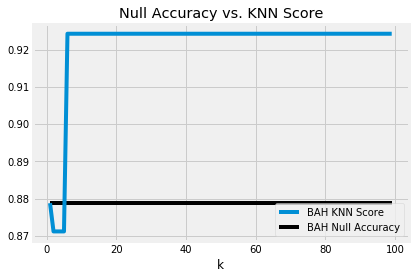

In [66]:
data = pd.DataFrame(bah_scores, columns = ['k','score'])
data.plot.line(x = 'k', y = 'score', label = "BAH KNN Score")
plt.hlines(y_bah_score, 1,99, label = 'BAH Null Accuracy')
plt.legend(loc = 4) 
plt.title("Null Accuracy vs. KNN Score");

This is a graphical representation showing that after K=6, the KNN score does not imporove at all

In [70]:
print('starting cell')
k_range = range(1,20)
training_error= []
testing_error = []
print('entering loop')
for k in k_range:
    print('loop round ',k)
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    
    y_pred_class = knn.predict(X_train)
    training_accuracy = metrics.accuracy_score(y_train, y_pred_class)
    training_error.append([k, 1-training_accuracy])
    
    y_pred_class = knn.predict(X_test)
    testing_accuracy = metrics.accuracy_score(y_test,y_pred_class)
    testing_error.append([k, 1-testing_accuracy])
    print("For ", k," neighbors the training accuracy was", training_accuracy, " and the testing accuracy was", testing_accuracy)

starting cell
entering loop
loop round  1
For  1  neighbors the training accuracy was 0.802269957506424  and the testing accuracy was 0.7861779018512289
loop round  2
For  2  neighbors the training accuracy was 0.8658508364694235  and the testing accuracy was 0.8607819039794787
loop round  3
For  3  neighbors the training accuracy was 0.8624739552620199  and the testing accuracy was 0.856691590062628
loop round  4
For  4  neighbors the training accuracy was 0.8721319516666846  and the testing accuracy was 0.8681959330056972
loop round  5
For  5  neighbors the training accuracy was 0.8716856619026686  and the testing accuracy was 0.8679359327108516
loop round  6
For  6  neighbors the training accuracy was 0.8737746017790834  and the testing accuracy was 0.871066657910643
loop round  7
For  7  neighbors the training accuracy was 0.8737402030685437  and the testing accuracy was 0.8711711941116634
loop round  8
For  8  neighbors the training accuracy was 0.8743625070137631  and the testing

The above cell prints our the training and testing accuracy for models betweeen one and nineteen neighbors. 

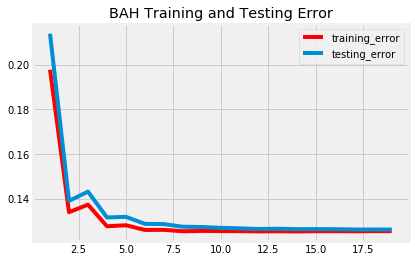

In [71]:
training_df = pd.DataFrame(training_error, columns = ['k', 'training_error'])
testing_df = pd.DataFrame(testing_error, columns = ['k', 'testing_error'])
#training_df.plot.line(x = 'k', y = 'training_error')
#testing_df.plot.line(x = 'k', y = 'testing_error')
plt.plot(training_df.k, training_df.training_error, 'r')
plt.plot(testing_df.k, testing_df.testing_error)
plt.legend()
plt.title('BAH Training and Testing Error')
plt.show()

The above cell show a visual representation of the correlation between the training and testing error. After 10 neighbors there is not much improvement in the accuracy, and an argument could be made to stop at 6 or less neighbors. 